In [2]:
import pandas as pd
import numpy as np
from scipy import stats

# Loading the data in Pandas dataframes
customers = pd.read_csv('Customers.csv', encoding='latin1')
exchange_rates = pd.read_csv('Exchange_Rates.csv', encoding='latin1')
products = pd.read_csv('Products.csv', encoding='latin1')
sales = pd.read_csv('Sales.csv', encoding='latin1')
stores = pd.read_csv('Stores.csv', encoding='latin1')

# Printing each dataframe
print("\nCustomers Sheet: \n\n", customers.head())
print("\n Exchange_Rates Sheet: \n\n", exchange_rates.head())
print("\n Products Sheet: \n\n", products.head())
print("\n Sales Sheet: \n\n", sales.head())
# print("\n Stores Sheet: \n\n", stores.head())



Customers Sheet: 

    CustomerKey  Gender               Name            City State Code  \
0          301  Female      Lilly Harding  WANDEARAH EAST         SA   
1          325  Female       Madison Hull      MOUNT BUDD         WA   
2          554  Female      Claire Ferres       WINJALLOK        VIC   
3          786    Male  Jai Poltpalingada    MIDDLE RIVER         SA   
4         1042    Male    Aidan Pankhurst   TAWONGA SOUTH        VIC   

               State Zip Code    Country  Continent    Birthday  
0    South Australia     5523  Australia  Australia    7/3/1939  
1  Western Australia     6522  Australia  Australia   9/27/1979  
2           Victoria     3380  Australia  Australia   5/26/1947  
3    South Australia     5223  Australia  Australia   9/17/1957  
4           Victoria     3698  Australia  Australia  11/19/1965  

 Exchange_Rates Sheet: 

        Date Currency  Exchange
0  1/1/2015      USD    1.0000
1  1/1/2015      CAD    1.1583
2  1/1/2015      AUD    1.2214

In [3]:
# Printing each dataset's descriptions

#print("\nCustomers Sheet Describe: \n\n", customers.describe())
#print("\n Data_Dictionary Sheet: \n\n", data_dictionary.describe())
print("\n Exchange_Rates Sheet: \n\n", exchange_rates.describe())
print("\n Products Sheet: \n\n", products.describe())
print("\n Sales Sheet: \n\n", sales.describe())
#print("\n Stores Sheet: \n\n", stores.describe())


 Exchange_Rates Sheet: 

            Exchange
count  11215.000000
mean       1.061682
std        0.245519
min        0.628500
25%        0.857800
50%        1.000000
75%        1.311900
max        1.725300

 Products Sheet: 

         ProductKey  SubcategoryKey  CategoryKey
count  2517.000000     2517.000000  2517.000000
mean   1259.000000      491.810091     4.878824
std     726.739637      229.887134     2.299170
min       1.000000      101.000000     1.000000
25%     630.000000      305.000000     3.000000
50%    1259.000000      406.000000     4.000000
75%    1888.000000      801.000000     8.000000
max    2517.000000      808.000000     8.000000

 Sales Sheet: 

        Order Number     Line Item   CustomerKey      StoreKey    ProductKey  \
count  6.288400e+04  62884.000000  6.288400e+04  62884.000000  62884.000000   
mean   1.430905e+06      2.164207  1.180797e+06     31.802144   1125.859344   
std    4.532963e+05      1.365170  5.859634e+05     22.978188    709.244010   
min   

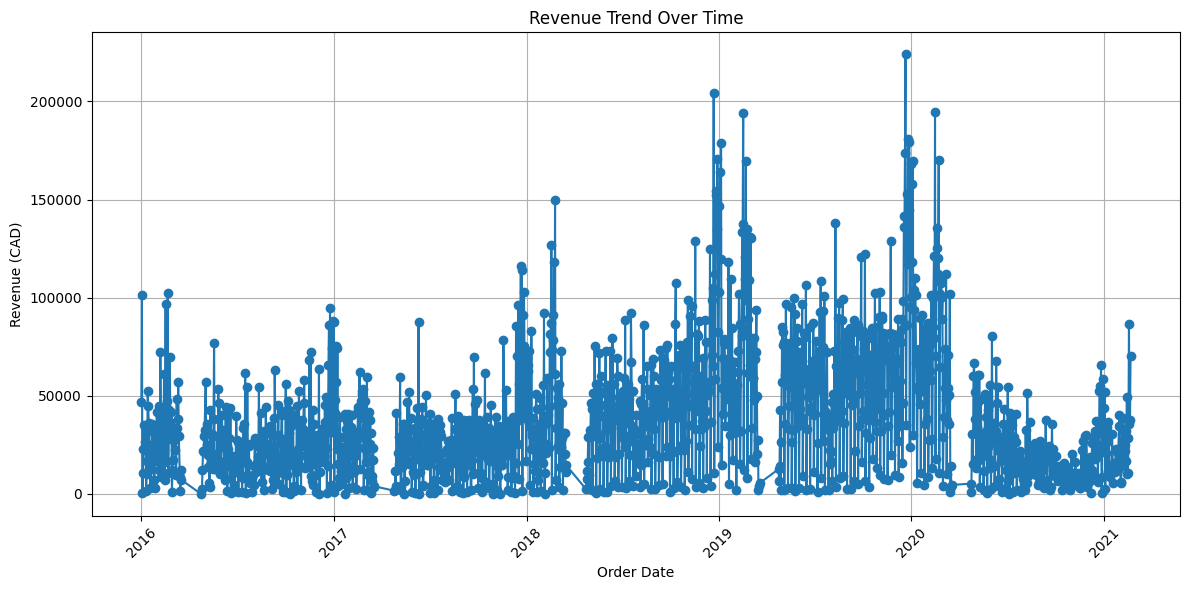

In [4]:
import matplotlib.pyplot as plt
# Merge sales with products to get product details
sales_products = pd.merge(sales, products, on='ProductKey')

# Merge with customers to get customer details
sales_products_customers = pd.merge(sales_products, customers, on='CustomerKey')

# Merge with stores to get store details
complete_sales = pd.merge(sales_products_customers, stores, on='StoreKey')

# Remove the dollar sign and convert 'Unit Price USD' and 'Unit Cost USD' to numeric
complete_sales['Unit Price USD'] = complete_sales['Unit Price USD'].replace('[\$,]', '', regex=True).astype(float)

# Function to convert revenue to CAD
def convert_to_cad(row):
    if row['Currency Code'] == 'CAD':
        return row['Unit Price USD'] * row['Quantity']
    exchange_rate = exchange_rates.loc[exchange_rates['Currency'] == row['Currency Code'], 'Exchange'].values[0]
    return row['Unit Price USD'] * row['Quantity'] / exchange_rate

# Add a new column for revenue in CAD
complete_sales['Revenue CAD'] = complete_sales.apply(convert_to_cad, axis=1)

# Convert Order Date to datetime
complete_sales['Order Date'] = pd.to_datetime(complete_sales['Order Date'])

# Group by Order Date to get revenue trend
revenue_trend = complete_sales.groupby('Order Date')['Revenue CAD'].sum().reset_index()

# Plotting the revenue trend
plt.figure(figsize=(12, 6))
plt.plot(revenue_trend['Order Date'], revenue_trend['Revenue CAD'], marker='o', linestyle='-')
plt.title('Revenue Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Revenue (CAD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

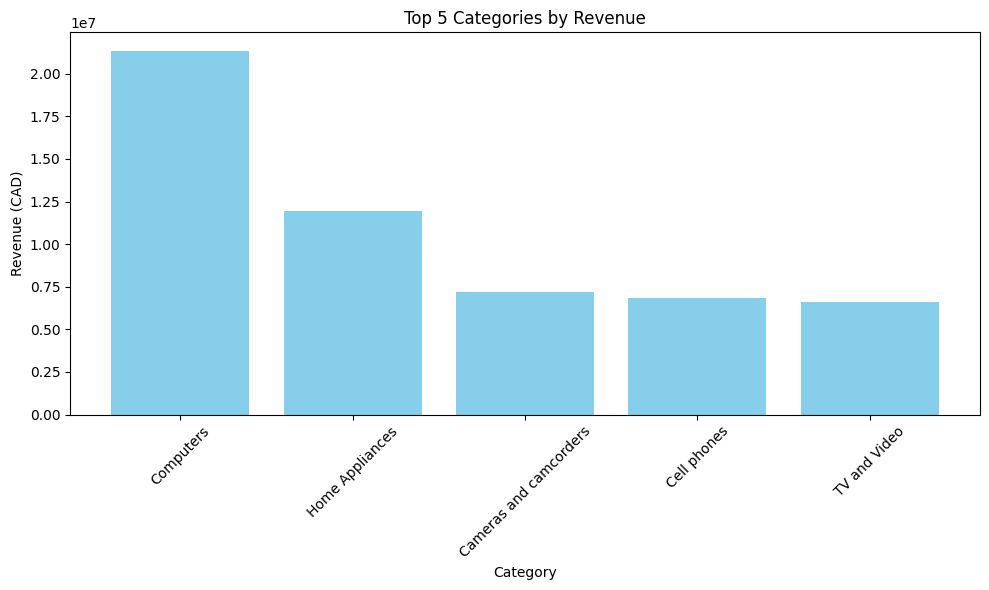

In [5]:
# Group by Category to get revenue per category
category_revenue = complete_sales.groupby('Category')['Revenue CAD'].sum().reset_index()

# Sort and get the top 5 categories by revenue
top_5_categories = category_revenue.sort_values(by='Revenue CAD', ascending=False).head(5)

# Plotting the top 5 categories by revenue
plt.figure(figsize=(10, 6))
plt.bar(top_5_categories['Category'], top_5_categories['Revenue CAD'], color='skyblue')
plt.title('Top 5 Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Revenue (CAD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


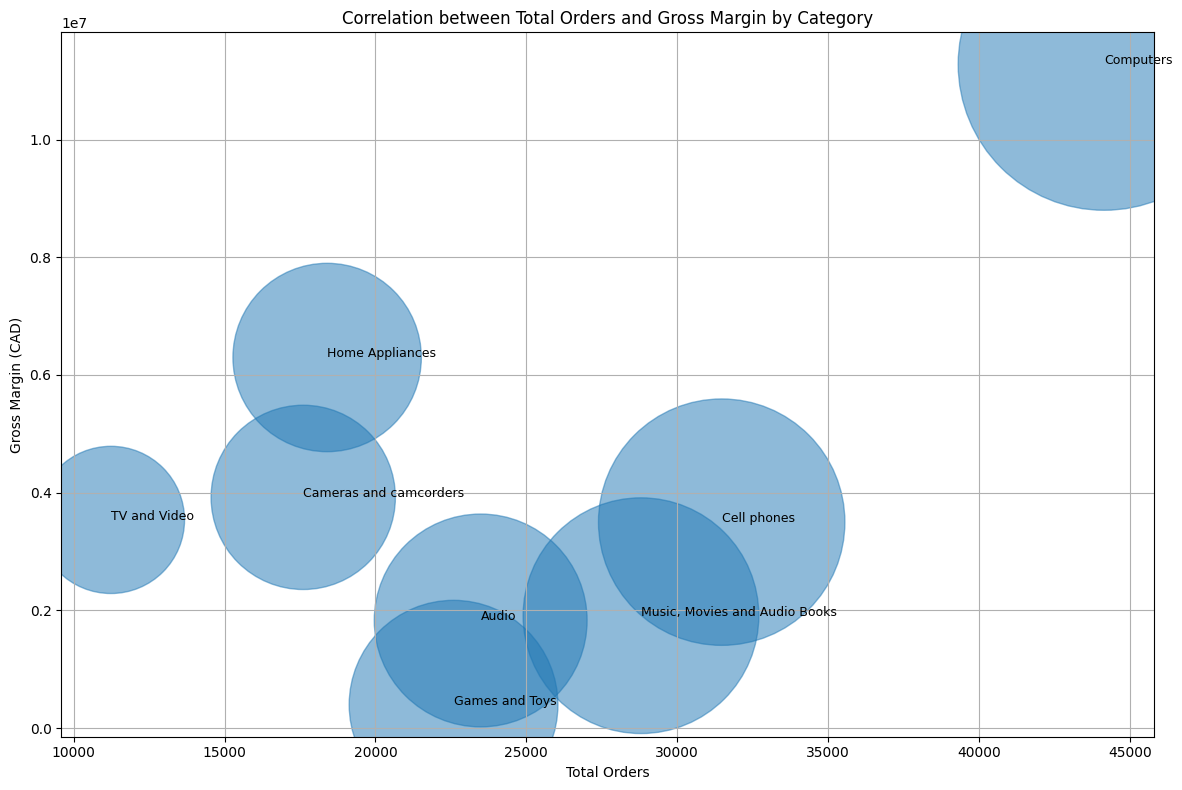

In [6]:
complete_sales['Unit Cost USD'] = complete_sales['Unit Cost USD'].replace('[\$,]', '', regex=True).astype(float)
# Calculate gross margin
complete_sales['Gross Margin'] = (complete_sales['Unit Price USD'] - complete_sales['Unit Cost USD']) * complete_sales['Quantity']


# Group by Category to get total orders and gross margin
category_metrics = complete_sales.groupby('Category').agg({
    'Quantity': 'sum',
    'Gross Margin': 'sum'
}).reset_index()

# Plotting the scatter chart
plt.figure(figsize=(12, 8))
plt.scatter(category_metrics['Quantity'], category_metrics['Gross Margin'], s=category_metrics['Quantity'], alpha=0.5)

# Add labels to the bubbles
for i in range(category_metrics.shape[0]):
    plt.text(category_metrics['Quantity'][i], category_metrics['Gross Margin'][i],
             category_metrics['Category'][i], fontsize=9)

plt.title('Correlation between Total Orders and Gross Margin by Category')
plt.xlabel('Total Orders')
plt.ylabel('Gross Margin (CAD)')
plt.grid(True)
plt.tight_layout()
plt.show()

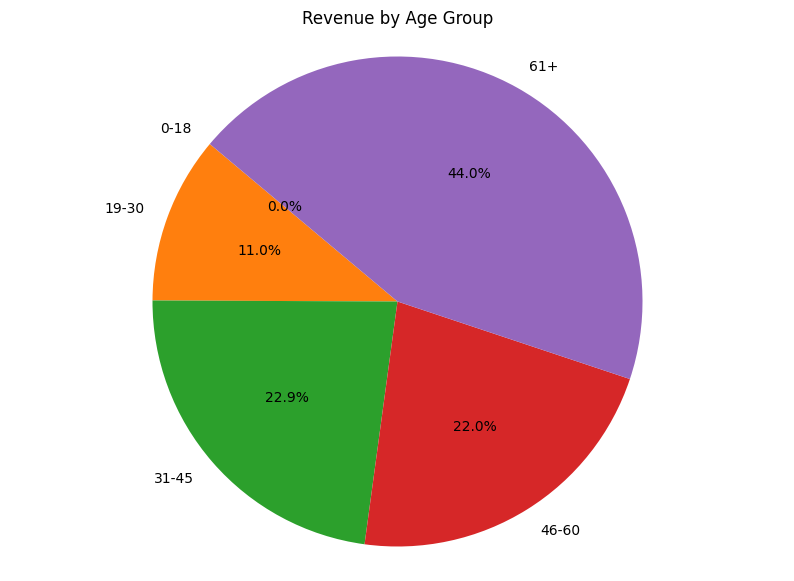

In [7]:

# Calculate the age of each customer
current_year = pd.to_datetime('today').year
complete_sales['Birth Year'] = pd.to_datetime(complete_sales['Birthday']).dt.year
complete_sales['Age'] = current_year - complete_sales['Birth Year']

# Define age groups
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61+']
complete_sales['Age Group'] = pd.cut(complete_sales['Age'], bins=bins, labels=labels, right=False)

# Calculate revenue by age group
age_group_revenue = complete_sales.groupby('Age Group')['Revenue CAD'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(age_group_revenue['Revenue CAD'], labels=age_group_revenue['Age Group'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue by Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

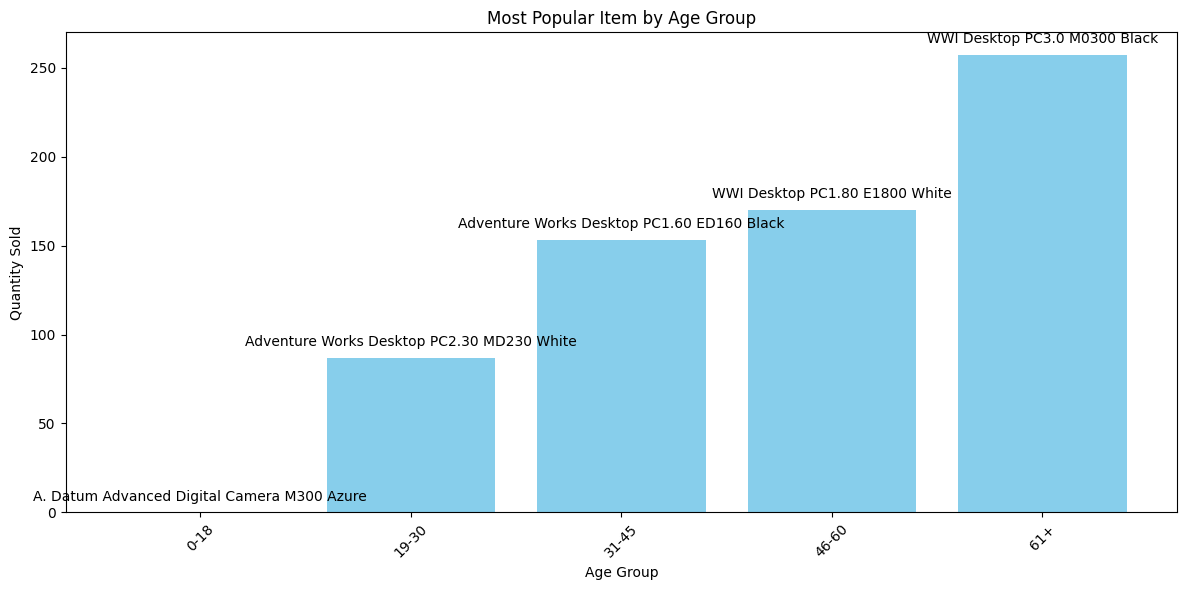

In [8]:
# Find the most popular item by age group
popular_items_by_age_group = complete_sales.groupby(['Age Group', 'Product Name'])['Quantity'].sum().reset_index()

# Sort by age group and quantity to find the most popular item
popular_items_by_age_group = popular_items_by_age_group.sort_values(['Age Group', 'Quantity'], ascending=[True, False])

# Get the most popular item in each age group
most_popular_items = popular_items_by_age_group.groupby('Age Group').first().reset_index()

# Visualization: Bar chart of most popular items by age group
plt.figure(figsize=(12, 6))
bars = plt.bar(most_popular_items['Age Group'], most_popular_items['Quantity'], color='skyblue')

# Adding labels
for bar, item in zip(bars, most_popular_items['Product Name']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, item, ha='center', va='bottom')

plt.title('Most Popular Item by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

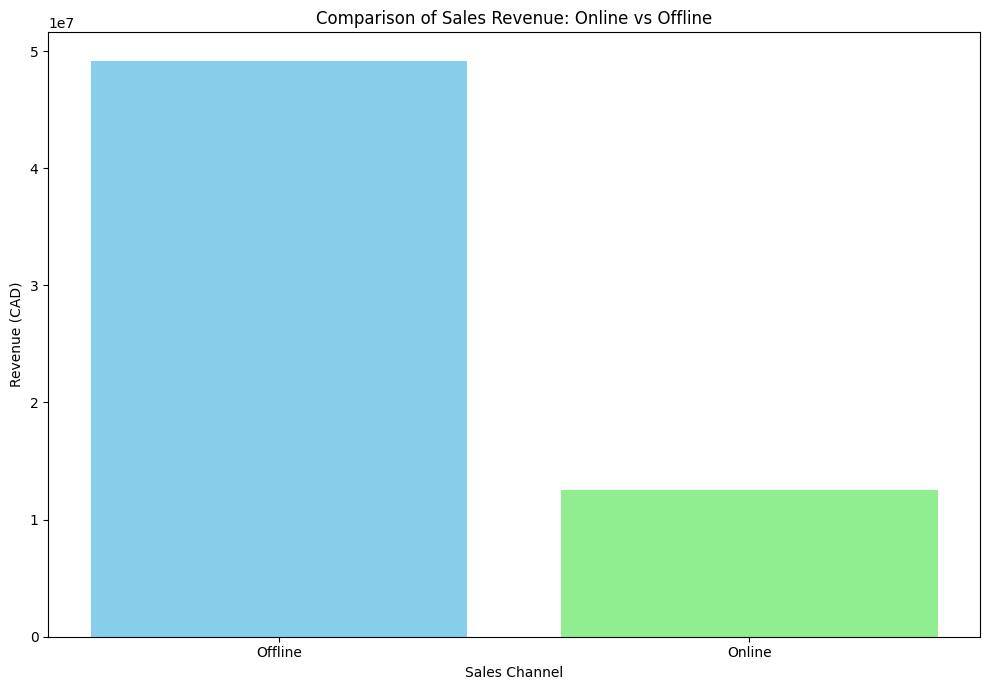

In [ ]:

# Determine if the sale is online or offline
complete_sales['Channel'] = np.where(complete_sales['StoreKey'] == 0, 'Online', 'Offline')

# Calculate revenue by channel
channel_revenue = complete_sales.groupby('Channel')['Revenue CAD'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 7))
plt.bar(channel_revenue['Channel'], channel_revenue['Revenue CAD'], color=['skyblue', 'lightgreen'])
plt.title('Comparison of Sales Revenue: Online vs Offline')
plt.xlabel('Sales Channel')
plt.ylabel('Revenue (CAD)')
plt.tight_layout()
plt.show()

In [9]:

# Convert Order Date to datetime
complete_sales['Order Date'] = pd.to_datetime(complete_sales['Order Date'])

# Determine if the sale is online or offline
complete_sales['Channel'] = np.where(complete_sales['StoreKey'] == 0, 'Online', 'Offline')

# Find the first date of sales for online and offline stores
first_date_online = complete_sales[complete_sales['Channel'] == 'Online']['Order Date'].min()
first_date_offline = complete_sales[complete_sales['Channel'] == 'Offline']['Order Date'].min()

print(f"First date of online store sales: {first_date_online}")
print(f"First date of offline store sales: {first_date_offline}")

First date of online store sales: 2016-01-01 00:00:00
First date of offline store sales: 2016-01-01 00:00:00


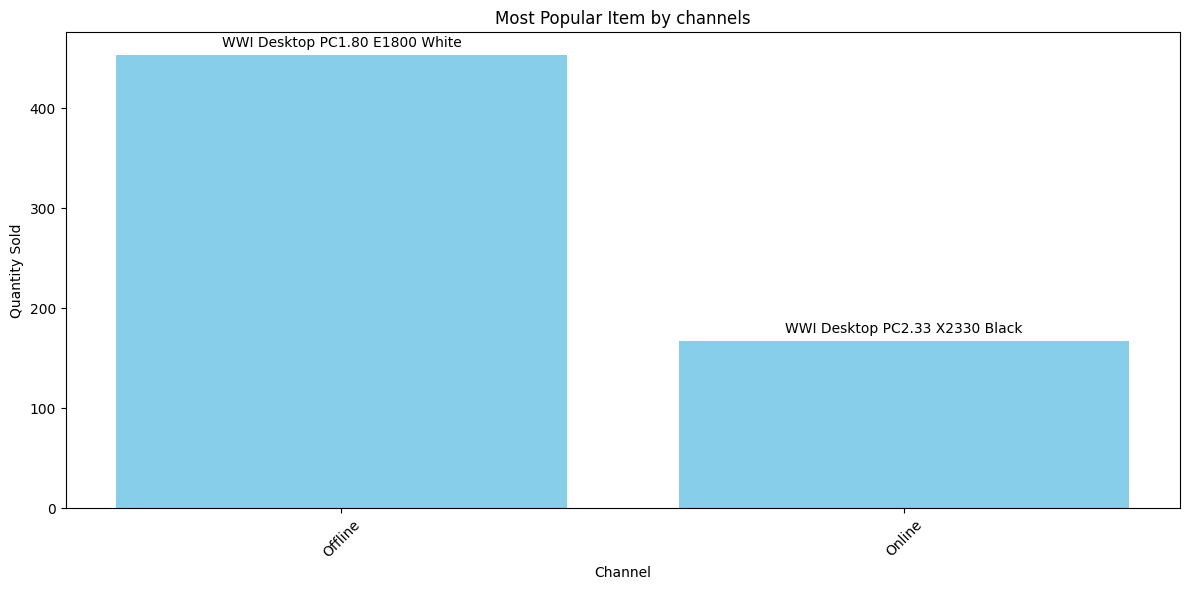

In [11]:
# Find the most popular item by channels
popular_items_by_age_group = complete_sales.groupby(['Channel', 'Product Name'])['Quantity'].sum().reset_index()

# Sort by channels and quantity to find the most popular item
popular_items_by_age_group = popular_items_by_age_group.sort_values(['Channel', 'Quantity'], ascending=[True, False])

# Get the most popular item in each channels
most_popular_items = popular_items_by_age_group.groupby('Channel').first().reset_index()

# Visualization: Bar chart of most popular items by channels
plt.figure(figsize=(12, 6))
bars = plt.bar(most_popular_items['Channel'], most_popular_items['Quantity'], color='skyblue')

# Adding labels
for bar, item in zip(bars, most_popular_items['Product Name']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, item, ha='center', va='bottom')

plt.title('Most Popular Item by channels')
plt.xlabel('Channel')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most Popular Age Group for Online Sales:
  Channel Age Group  Quantity
9  Online       61+     18485

Most Popular Age Group for Offline Sales:
   Channel Age Group  Quantity
4  Offline       61+     68796


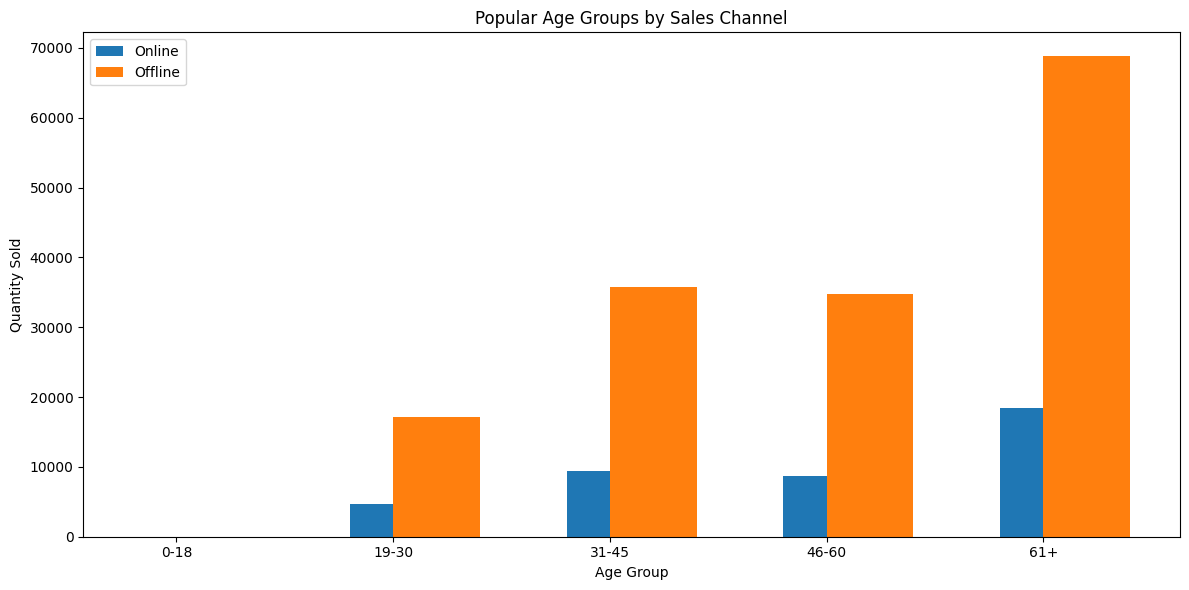

In [12]:
# Find the total quantity sold for each age group by channel
age_group_channel = complete_sales.groupby(['Channel', 'Age Group'])['Quantity'].sum().reset_index()

# Find the most popular age group by channel
most_popular_age_group_online = age_group_channel[age_group_channel['Channel'] == 'Online'].sort_values(by='Quantity', ascending=False).head(1)
most_popular_age_group_offline = age_group_channel[age_group_channel['Channel'] == 'Offline'].sort_values(by='Quantity', ascending=False).head(1)

# Display the most popular age group by channel
print("Most Popular Age Group for Online Sales:")
print(most_popular_age_group_online)

print("\nMost Popular Age Group for Offline Sales:")
print(most_popular_age_group_offline)

# Visualization: Bar chart of popular age groups by channel
plt.figure(figsize=(12, 6))
online_data = age_group_channel[age_group_channel['Channel'] == 'Online']
offline_data = age_group_channel[age_group_channel['Channel'] == 'Offline']

plt.bar(online_data['Age Group'], online_data['Quantity'], width=0.4, label='Online', align='center')
plt.bar(offline_data['Age Group'], offline_data['Quantity'], width=0.4, label='Offline', align='edge')

plt.title('Popular Age Groups by Sales Channel')
plt.xlabel('Age Group')
plt.ylabel('Quantity Sold')
plt.legend()
plt.tight_layout()
plt.show()